In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the Data
file_path = '/Users/ehast/Desktop/risk data/final_recommendation_data.csv' 
data = pd.read_csv(file_path)

# Step 2: Preprocess the Data
# Dropping columns that might not be useful for a basic classification model
data_preprocessed = data.drop(columns=['NAME', 'Year', 'Recommendation'])

# Handling categorical data - converting 'risk_level' to numerical values
label_encoder = LabelEncoder()
data_preprocessed['risk_level'] = label_encoder.fit_transform(data_preprocessed['risk_level'])

# Step 3: Split the Data
# Splitting the data into features (X) and target (y)
X = data_preprocessed.drop('risk_level', axis=1)
y = data_preprocessed['risk_level']

# Split the Data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build the Model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Step 5: Evaluate the Model
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.98      1.00      0.99        56
           2       1.00      0.99      0.99        91

    accuracy                           0.99       175
   macro avg       0.99      1.00      1.00       175
weighted avg       0.99      0.99      0.99       175



In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Preprocess the Data
data_preprocessed = data.drop(columns=['NAME', 'Year', 'Recommendation'])
label_encoder = LabelEncoder()
data_preprocessed['risk_level'] = label_encoder.fit_transform(data_preprocessed['risk_level'])

# Split the data into features (X) and target (y)
X = data_preprocessed.drop('risk_level', axis=1)
y = data_preprocessed['risk_level']

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier()

# Perform 10-fold Cross-Validation
cv_scores = cross_val_score(clf, X, y, cv=10)

# Print the cross-validation scores and their average
print("Cross-validation scores for each fold:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())


Cross-validation scores for each fold: [0.96590909 1.         1.         1.         1.         1.
 1.         0.98850575 1.         0.98850575]
Average cross-validation score: 0.9942920585161964


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


# Preprocess the Data
data_preprocessed = data.drop(columns=['NAME', 'Year', 'Recommendation'])
label_encoder = LabelEncoder()
data_preprocessed['risk_level'] = label_encoder.fit_transform(data_preprocessed['risk_level'])

# Binarize the output (one-hot encode)
y = label_binarize(data_preprocessed['risk_level'], classes=[0, 1, 2])
n_classes = y.shape[1]

# Split the data into features (X) and target (y)
X = data_preprocessed.drop('risk_level', axis=1)

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Model
clf = OneVsRestClassifier(DecisionTreeClassifier())
clf.fit(X_train, y_train)

# Predict probabilities
y_probs = clf.predict_proba(X_test)

# Compute ROC AUC for each class
roc_auc = [roc_auc_score(y_test[:, i], y_probs[:, i]) for i in range(n_classes)]

print("AUC-ROC for each class:", roc_auc)
print("Average AUC-ROC:", sum(roc_auc) / n_classes)


AUC-ROC for each class: [1.0, 0.9868697478991597, 0.9945054945054945]
Average AUC-ROC: 0.9937917474682182


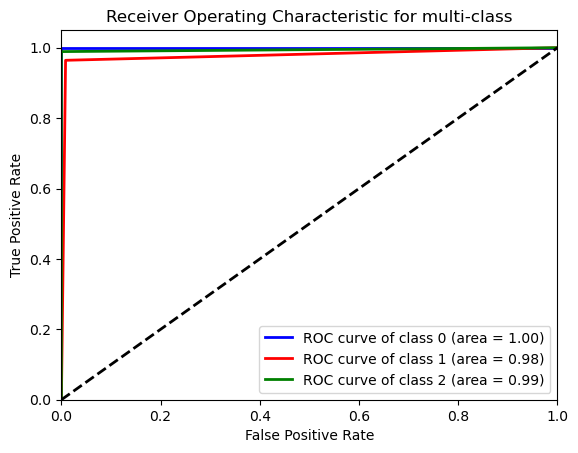

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Preprocess the Data
data_preprocessed = data.drop(columns=['NAME', 'Year', 'Recommendation'])
label_encoder = LabelEncoder()
data_preprocessed['risk_level'] = label_encoder.fit_transform(data_preprocessed['risk_level'])

# Binarize the output (one-hot encode)
y = label_binarize(data_preprocessed['risk_level'], classes=[0, 1, 2])
n_classes = y.shape[1]

# Split the data into features (X) and target (y)
X = data_preprocessed.drop('risk_level', axis=1)

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Model
clf = OneVsRestClassifier(DecisionTreeClassifier())
clf.fit(X_train, y_train)

# Predict probabilities
y_probs = clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC Curve
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()
